In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import  seaborn as sns

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Distance euclidienne

In [1]:
def calcul_moyenne(X):
    return np.array([np.array(X[X['y']==i][['x1','x2']].mean()) for i in range(1,6)])

In [2]:
def calcul_cov(X):
     return np.array([np.cov(np.array(X[X['y']==i][['x1','x2']]).T) for i in range(1,6)])

In [2]:
data1=pd.read_csv('data/data_tp1_app.txt',names=['y','x1','x2'],sep=" ")
test=pd.read_csv('data/data_tp1_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data1)
cov=calcul_cov(data1)

NameError: name 'calcul_moyenne' is not defined

In [ ]:
def predi_distance_euclidien(x):
    dist=np.array([np.linalg.norm(x-u[i]) for i in range(5)])
    top1=np.argmin(dist)
    dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
    top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
    return top1+1,top2+1

In [ ]:
def predi_distance_mahanalobis(x):
     dist=[(x-u[i]).T@np.linalg.inv(cov[i])@(x-u[i])+np.log(np.linalg.det(cov[i])) for i in range(5)]
     top1=np.argmin(dist)
     dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
     top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
     return top1+1,top2+1

In [ ]:
def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction,sample = 300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list]
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [ ]:
def visualisation(test,methode):
    test=test[['x1','x2']]
    y_pred=[methode(i)[0] for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,6):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    plot_decision_multi(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),prediction=methode)
    plt.axis('equal')
    plt.show()

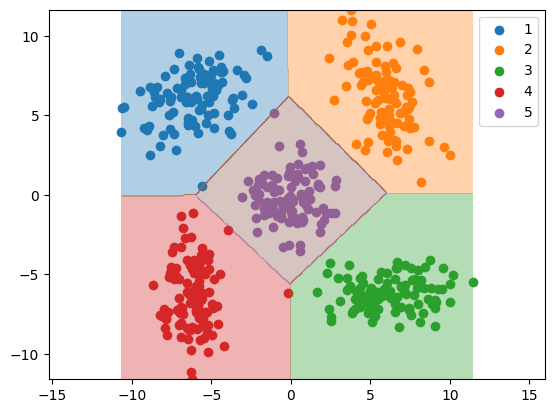

In [ ]:
visualisation(test,predi_distance_euclidien)

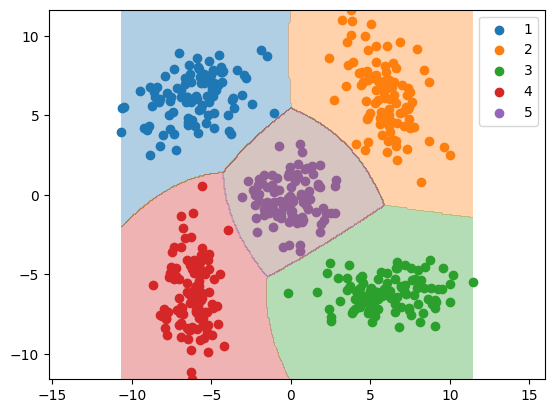

In [ ]:
visualisation(test,predi_distance_mahanalobis)

<Axes: >

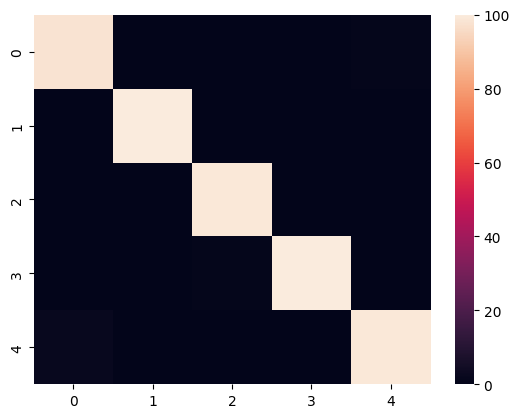

In [ ]:
a,b,c=calcul_matrice(test,predi_distance_euclidien)
sns.heatmap(c)

<Axes: >

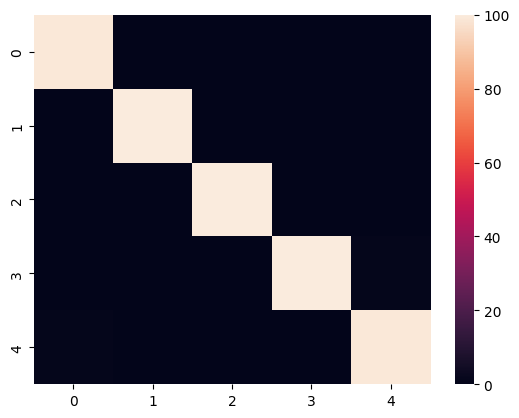

In [ ]:
a,b,c=calcul_matrice(test,predi_distance_mahanalobis)
sns.heatmap(c)

In [ ]:
calcul_matrice(test,predi_distance_mahanalobis)

(0.996,
 0.002,
 [[99, 0, 0, 0, 0],
  [0, 100, 0, 0, 0],
  [0, 0, 100, 0, 0],
  [0, 0, 0, 100, 1],
  [1, 0, 0, 0, 99]])

# Dataset 2

In [ ]:
data2=pd.read_csv('data/data_tp2_app.txt',names=['y','x1','x2'],sep=" ")
test2=pd.read_csv('data/data_tp2_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data2)
cov=calcul_cov(data2)

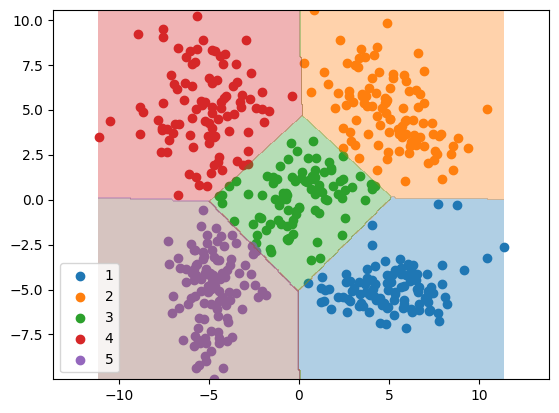

In [ ]:
visualisation(test2,predi_distance_euclidien)

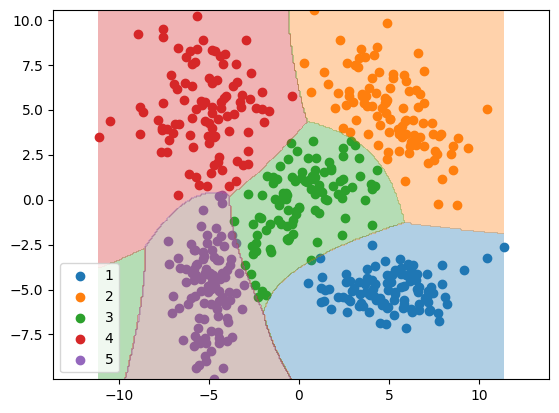

In [ ]:
visualisation(test2,predi_distance_mahanalobis)

<Axes: >

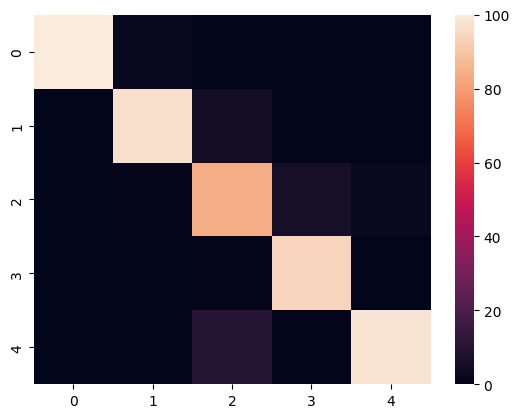

In [ ]:
a,b,c=calcul_matrice(test2,predi_distance_euclidien)
sns.heatmap(c)

<Axes: >

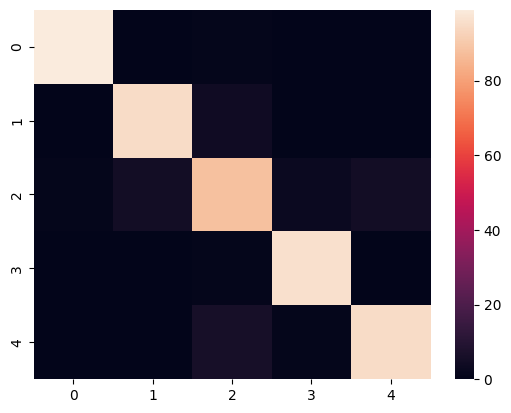

In [ ]:
a,b,c=calcul_matrice(test2,predi_distance_mahanalobis)
sns.heatmap(c)

# Dataset 3

In [ ]:
data3=pd.read_csv('data/data_tp3_app.txt',names=['y','x1','x2'],sep=" ")
test3=pd.read_csv('data/data_tp3_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data3)
cov=calcul_cov(data3)

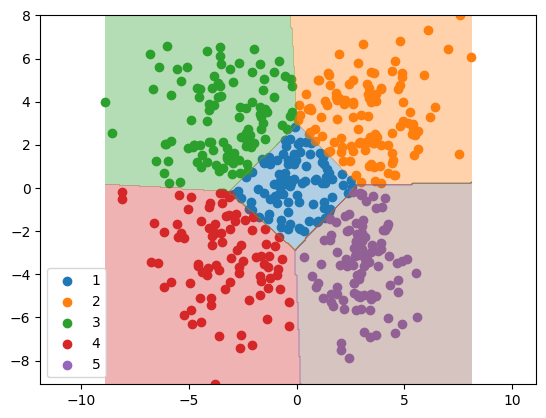

In [ ]:
visualisation(test3,predi_distance_euclidien)

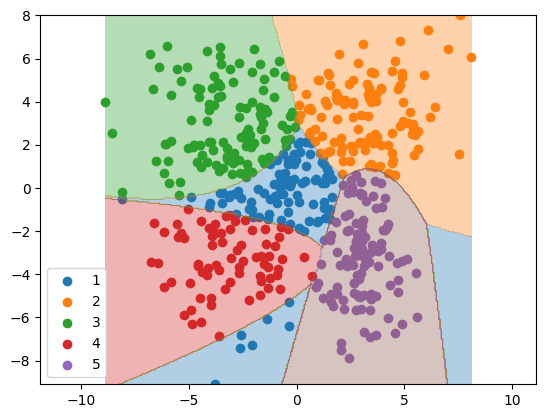

In [ ]:
visualisation(test3,predi_distance_mahanalobis)

<Axes: >

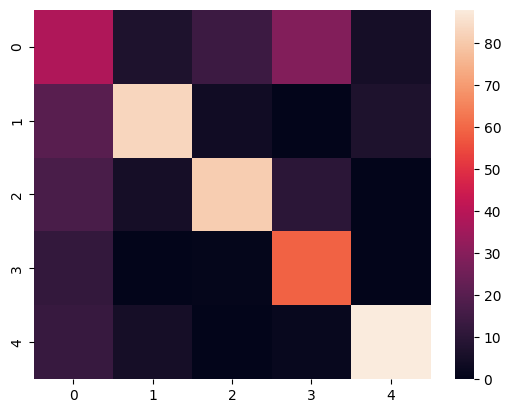

In [ ]:
a,b,c=calcul_matrice(test3,predi_distance_mahanalobis)
sns.heatmap(c)

<Axes: >

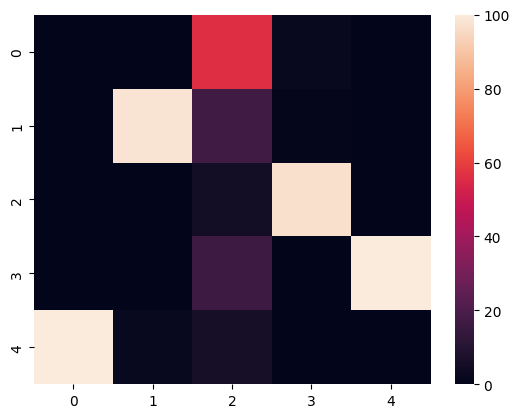

In [ ]:
a,b,c=calcul_matrice(test2,predi_distance_euclidien)
sns.heatmap(c)

# Parzen

In [ ]:
def plot_decision_multi2(x1_min, x1_max, x2_min, x2_max, prediction,data="",sample = 100):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(data,np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list]
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [ ]:
def visualisation2(test,methode,data=""):
    test=test[['x1','x2']]
    y_pred=[methode(data,i)[0] for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,7):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    #plot_decision_multi2(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),prediction=methode,data=data)
    plt.axis('equal')
    plt.show()

In [ ]:
def calcul_matrice2(tain,test,methode):
  y=list(test['y'])
  top1=[methode(tain,k)[0] for k in test[['x1','x2']].values.tolist()]
  top2=[methode(tain,k)[1] for k in test[['x1','x2']].values.tolist()]
  matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
  errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
  errer_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)
  return errer_top1,errer_top2,matrice

In [ ]:
def parzen_uniforme(data,x):
   dist=[]
   for i in range(1,6):
       c=data[data['y']==i][['x1','x2']].values.tolist()
       dist.append(sum([0.5 if np.linalg.norm(np.array(j)-np.array(x))/1.5<1 else 0 for j in c]))
   if max(dist)==0:
       return 6,6
   top1=np.argmax(dist)
   dist[top1]=min(dist)-1 #je remplace la valeur de top1 par min-1 pour l'exclure
   top2=np.argmax(dist) #je recupere le nouveau top1(qui est en realite le top2)
   return top1+1,top2+1

In [ ]:
def parzen_gassien(data,x):
    s=1/((2*np.pi)**(len(x)/2))
    dist=np.array([sum([s*np.exp(-0.5*(np.array(j)-np.array(x)).T@ (np.array(j)-np.array(x))) for j in data[data['y']==i][['x1','x2']].values.tolist()])  for i in range(1,6)])
    top1=np.argmax(dist)
    dist[top1]=min(dist)-1  #je remplace la valeur de top1 par min-1 pour l'exclure
    top2=np.argmax(dist) #je recupere le nouveau top1(qui est en realite le top2)
    return top1+1,top2+1

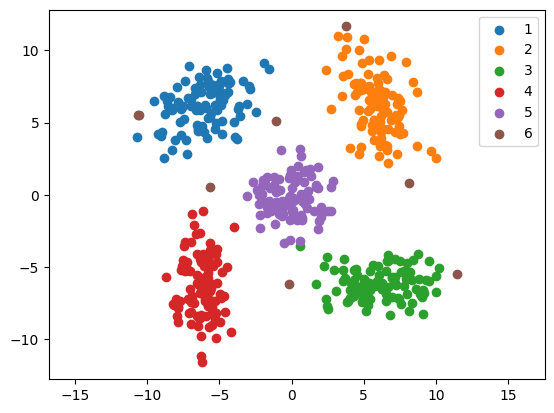

In [ ]:
visualisation2(test,parzen_uniforme,data1)

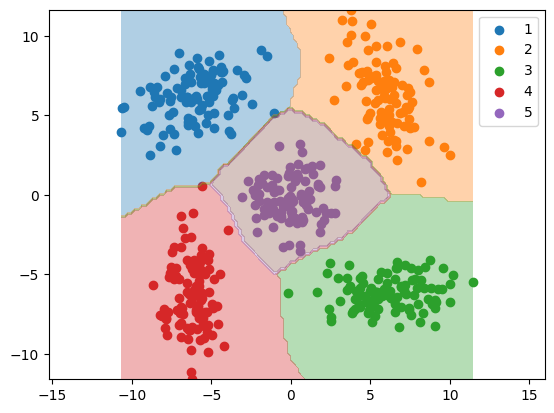

In [ ]:
visualisation2(test,parzen_gassien,data1)

<Axes: >

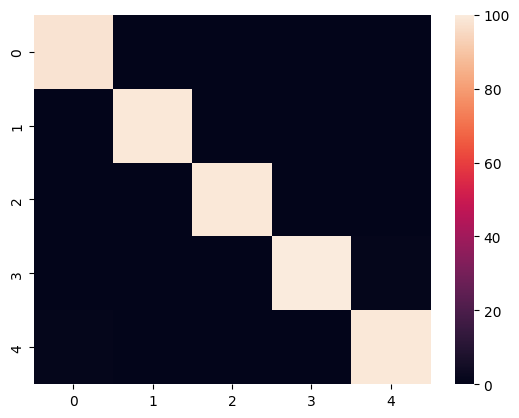

In [ ]:
a,b,c=calcul_matrice(data1,test,parzen_uniforme)
sns.heatmap(c)

<Axes: >

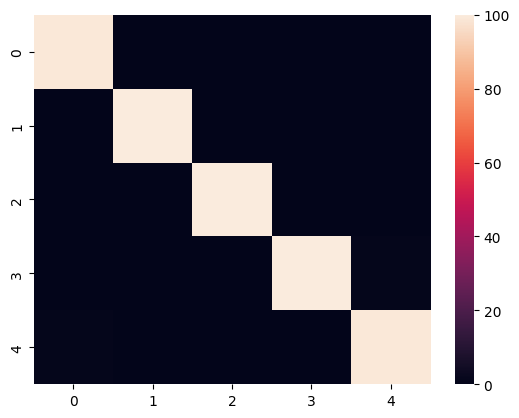

In [ ]:
a,b,c=calcul_matrice(data1,test,parzen_gassien)
sns.heatmap(c)

# KPPV

In [ ]:
def kppv(train,x,k=5):
    t=train.copy()
    t['dist']=[np.linalg.norm(np.array(y)-np.array(x)) for y in train[['x1','x2']].values.tolist()]
    k_voisins=list(t.sort_values('dist')[:k+1]['y'])
    majorite=max([k_voisins.count(i) for i in set(k_voisins)])
    classe=[i for i in set(k_voisins) if k_voisins.count(i)==majorite]
    return classe

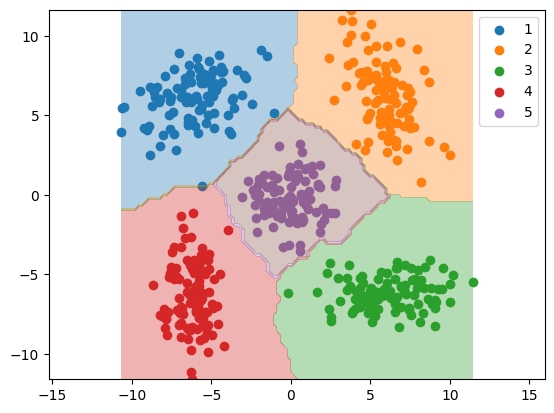

In [ ]:
visualisation2(test,kppv,data1)

In [ ]:
a,b,c=calcul_matrice(traintest2,predi_distance_mahanalobis)
sns.heatmap(c)

np.True_

In [81]:
def train_separatrice_lineaire(data):
    A=[]
    for i in data['y'].unique():
        for j in data['y'].unique():
            if i<j:
                s=data.copy()
                s=s[(s['y']==i) | (s['y']==j)]
                s['plus']=np.ones(len(s))
                s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == j else row[['x1','x2','plus']], axis=1)
                s=s[['x1','x2','plus']]
                s=np.array(s)
                a=np.ones(s.shape[1])
                compt=1
                while compt!=0:
                    compt=0
                    for k in s:
                       if a@k<0:
                           compt=1
                           a=a+k
                A.append([a,(i,j)])
    return A

In [76]:
def compt_occur(l):
    max=0
    res=0
    for i in l:
        compt=0
        for j in l:
            if i==j:
                compt+=1
        if compt>=max:
            max=compt
            res=i
    return res

In [65]:
def calcul_classe(x):
    x.append(1)
    classe=[]
    for i in a:
        if i[0]@x>0:
            classe.append(i[1][0])
        else:
            classe.append(i[1][1])
    return compt_occur(classe)

In [88]:
a=train_separatrice_lineaire(data1)
a

[[array([-17.301611,   0.017345,   1.      ]), (1, 2)],
 [array([-7.920876,  3.705258,  2.      ]), (1, 3)],
 [array([-2.09655 , 11.731151,  1.      ]), (1, 4)],
 [array([ -1.454736,   3.84203 , -15.      ]), (1, 5)],
 [array([-0.851054, 14.181652,  1.      ]), (2, 3)],
 [array([1., 1., 1.]), (2, 4)],
 [array([  2.275418,   4.982442, -24.      ]), (2, 5)],
 [array([13.248846,  0.612214,  1.      ]), (3, 4)],
 [array([  2.662573,  -3.608254, -13.      ]), (3, 5)],
 [array([ -3.767435,  -1.877953, -16.      ]), (4, 5)]]

In [84]:
def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction,sample = 300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction([x1,x2]) for x1 in x1_list] for x2 in x2_list]
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [78]:
def visualisation(test,methode):
    test=test[['x1','x2']]
    y_pred=[methode(i) for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,6):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    plot_decision_multi(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),prediction=methode)
    plt.axis('equal')
    plt.show()

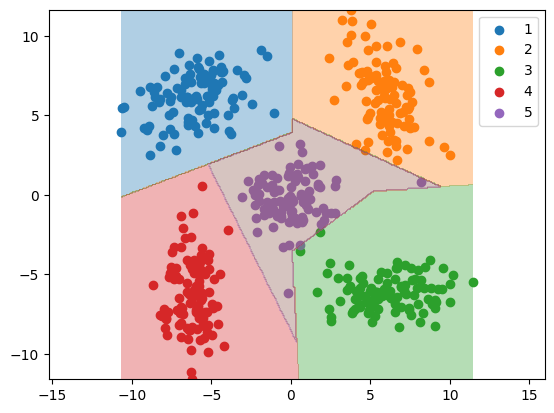

In [85]:
visualisation(test,calcul_classe)

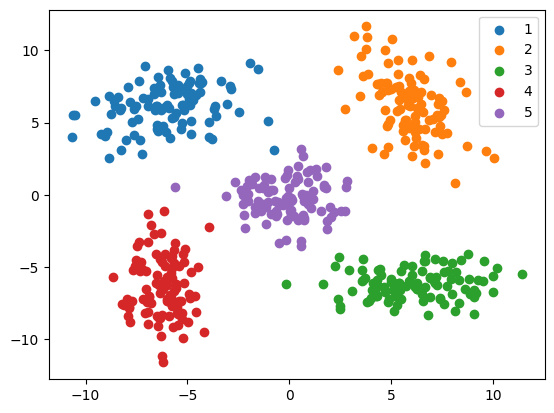

In [96]:
for label in range(1,6):
        plt.scatter(test[test['y']== label]['x1'], test[test['y']== label]['x2'], label=label)
plt.legend()

In [92]:
def calcul_matrice(test,methode):
  y=list(test['y'])
  top1=[methode(k) for k in test[['x1','x2']].values.tolist()]
  matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
  errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
  return errer_top1,matrice

In [93]:
calcul_matrice(test,calcul_classe)

(0.988,
 [[99, 0, 0, 0, 0],
  [0, 99, 0, 0, 0],
  [0, 0, 99, 0, 2],
  [0, 0, 0, 100, 1],
  [1, 1, 1, 0, 97]])

In [54]:
def train_separatrice_lineaire2(data):
    A=[]
    for i in data['y'].unique():
        s=data[data['y']!=5].copy()
        s['plus']=np.ones(len(s))
        s['y']=s.apply(lambda row: 0 if row['y'] != i else row['y'], axis=1)
        s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == 0 else row[['x1','x2','plus']], axis=1)
        s=s[['x1','x2','plus']]
        s=np.array(s)
        a=np.ones(s.shape[1])
        compt=1
        j=0
        while compt!=0 and j<1000:
            compt=0
            for k in s:
               if a@k<0:
                 compt=1
                 a=a+k
            j+=1
        A.append(a)
    return A

In [86]:
a2=train_separatrice_lineaire2(data1)
a2

[array([-12.594787,  10.719469, -79.      ]),
 array([ 11.84164 ,   8.857353, -73.      ]),
 array([  27.602709,  -14.910527, -156.      ]),
 array([ -30.427035,  -34.101503, -208.      ]),
 array([ -3.835528,  -0.380753, -41.      ])]

In [68]:
def calcul_classe2(x):
    x.append(1)
    classe=[]
    for i in range(len(a2)):
        if a2[i]@x>0:
            classe.append(i+1)
    return compt_occur(classe)

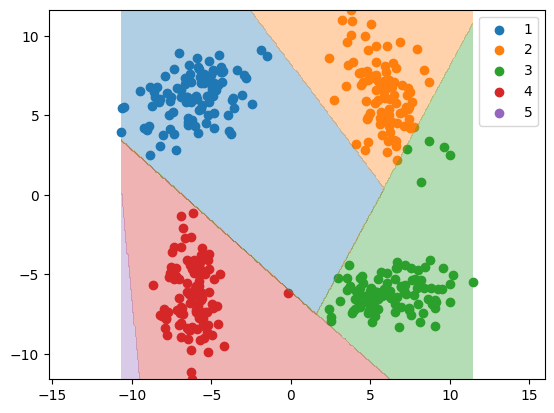

In [87]:
visualisation(test[test['y']!=5],calcul_classe2)

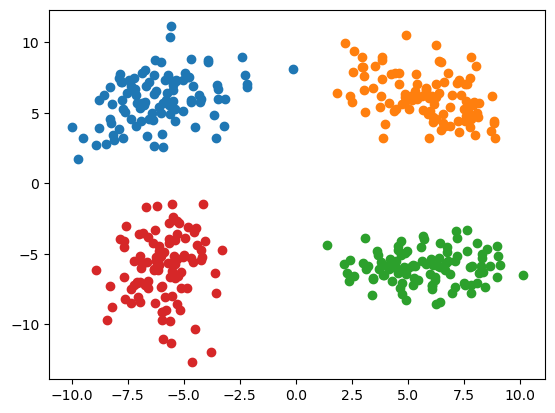

In [52]:
s1=data1[data1['y']!=5].copy()
for label in range(1,5):
    plt.scatter(s1[s1['y']== label]['x1'], s1[s1['y']== label]['x2'], label=label)

In [34]:
class Methode_Parametrique:
    def __init__(self):
        self.methode=""
    
    def predict(self,x):
         return self.methode(x)
        
    def calcul_matrice(self,test):
          y=list(test['y'])
          top1=[self.methode(k)[0] for k in test[['x1','x2']].values.tolist()]
          top2=[self.methode(k)[1] for k in test[['x1','x2']].values.tolist()]
          matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
          errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
          errer_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)
          return errer_top1,errer_top2,matrice
        
    def plot_decision_multi(self,x1_min, x1_max, x2_min, x2_max,sample = 300):
        x1_list = np.linspace(x1_min, x1_max, sample)
        x2_list = np.linspace(x2_min, x2_max, sample)
        y_grid_pred = [[self.methode([x1,x2])[0] for x1 in x1_list] for x2 in x2_list]
        l = np.shape(np.unique(y_grid_pred))[0] - 1
        plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)
        
    def visualisation(self,test):
        test=test[['x1','x2']]
        y_pred=[self.methode(i)[0] for i in test.values.tolist()]
        test['y_predi']=y_pred
        for label in range(1,6):
            plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
        plt.legend()
        self.plot_decision_multi(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max())
        plt.axis('equal')
        plt.show()

In [33]:
class Estimateur_Gaussien(Methode_Parametrique):
    def __init__(self,type="distance_euclidienne"):
        self.type=type
        self.moy=0
        self.cov=0
        if self.type=="distance_euclidienne":
            self.methode=self.predi_distance_euclidien
        else:
            self.methode=self.predi_distance_mahanalobis
            
    def train(self,data):
         self.moy=np.array([np.array(data[data['y']==i][['x1','x2']].mean()) for i in range(1,6)])
         self.cov=np.array([np.cov(np.array(data[data['y']==i][['x1','x2']]).T) for i in range(1,6)])
        
    def predi_distance_euclidien(self,x):
            x=np.array(x)
            dist=np.array([np.linalg.norm(x-u[i]) for i in range(5)])
            top1=np.argmin(dist)
            dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
            top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
            return top1+1,top2+1
        
    def predi_distance_mahanalobis(self,x):
             x=np.array(x)
             dist=[(x-u[i]).T@np.linalg.inv(cov[i])@(x-u[i])+np.log(np.linalg.det(cov[i])) for i in range(5)]
             top1=np.argmin(dist)
             dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
             top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
             return top1+1,top2+1
    

In [103]:
class Separateur_Lineaire(Methode_Parametrique):
    def __init__(self):
        self.vecteur_normal=[]
        self.type=""
        self.methode=self.predict
        
    def train_un_vs_un(self,data,max_iter):
        for i in data['y'].unique():
            for j in data['y'].unique():
                if i<j:
                    s=data.copy()
                    s=s[(s['y']==i) | (s['y']==j)]
                    s['plus']=np.ones(len(s))
                    s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == j else row[['x1','x2','plus']], axis=1)
                    s=s[['x1','x2','plus']]
                    s=np.array(s)
                    a=np.ones(s.shape[1])
                    compt=1
                    j=0
                    while compt!=0 and j<max_iter:
                        for k in s:
                           if a@k<0:
                               compt=1
                               a=a+k
                        j+=1
                    self.vecteur_normal.append([a,(i,j)])
                    
    def train_un_vs_tous(self,data,max_iter):
        for i in data['y'].unique():
            s=data[data['y']!=5].copy()
            s['plus']=np.ones(len(s))
            s['y']=s.apply(lambda row: 0 if row['y'] != i else row['y'], axis=1)
            s[['x1','x2','plus']]=s.apply(lambda row: -row[['x1','x2','plus']] if row['y'] == 0 else row[['x1','x2','plus']], axis=1)
            s=s[['x1','x2','plus']]
            s=np.array(s)
            a=np.ones(s.shape[1])
            compt=1
            j=0
            while compt!=0 and j<max_iter:
                compt=0
                for k in s:
                   if a@k<0:
                     compt=1
                     a=a+k
                j+=1
            self.vecteur_normal.append(a)
                    
    def train(self,data,type="un_vs_un",max_iter=1000):
        self.type=type
        if self.type=="un_vs_un":
            self.train_un_vs_un(data,max_iter)
        else:
            self.train_un_vs_tous(data,max_iter)
    def compt_occur(l):
        max=0
        res=0
        for i in l:
            compt=0
            for j in l:
                if i==j:
                    compt+=1
            if compt>=max:
                max=compt
                res=i
        return res       
    def predict(self,x):
        x.append(1)
        classe=[]     
        if self.type=="un_vs_un":
            for i in self.vecteur_normal:
                if i[0]@x>0:
                    classe.append(i[1][0])
                else:
                    classe.append(i[1][1])
        else:
          for i in range(len(self.vecteur_normal)):
              if self.vecteur_normal[i]@x>0:
                 classe.append(i+1)
        return self.compt_occur(classe)
        
    def calcul_matrice(self,test):
          y=list(test['y'])
          top1=[self.methode(k) for k in test[['x1','x2']].values.tolist()]
          matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
          errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
          return errer_top1,matrice
        

In [105]:
sep=Separateur_Lineaire()
sep.train(data1)
sep.visualisation(test)

TypeError: Separateur_Lineaire.compt_occur() takes 1 positional argument but 2 were given

In [60]:
s=np.array([4,4,5,5])
np.argmax(np.bincount(s))

4